По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса. 

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [1]:
from scipy import stats

In [2]:
stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.08222258891386608

Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться?

In [3]:
stats.binom_test(22, 50, 0.75, alternative = 'two-sided')

3.4831478978300243e-06

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('pines.txt', delimiter='\t')
df.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [6]:
bins_x = range(0, 201, 40)
bins_y = range(0, 201, 40)
x = df.values[:, 0]
y = df.values[:, 1]
square_5_5_pines_quantity = stats.binned_statistic_2d(x, y, np.arange(len(df)), statistic='count', bins=[bins_x, bins_y])[0]
square_5_5_pines_quantity

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

(array([[18., 26., 29., 25., 20.],
        [14., 12., 22., 34., 25.],
        [12., 24., 15., 50., 37.],
        [ 8., 19., 31., 50.,  7.],
        [ 7.,  8., 37., 27., 27.]]),
 array([  0,  40,  80, 120, 160, 200]),
 array([  0,  40,  80, 120, 160, 200]),
 <matplotlib.image.AxesImage at 0x7faab842ad50>)

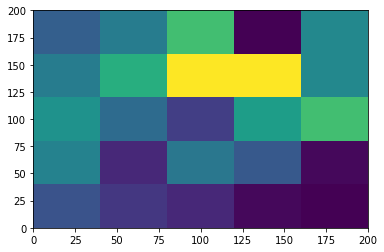

In [7]:
plt.hist2d(x, y, bins=[bins_x, bins_y])

In [8]:
square_5_5_pines_quantity.mean()

23.36

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно? 

Нулевое распределение статистики — хи-квадрат с 25−1=24 степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы K−1, где K — количество интервалов).

Посчитайте достигаемый уровень значимости.  

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare  — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

In [9]:
real_values = square_5_5_pines_quantity.reshape(25)
expected_values = square_5_5_pines_quantity.mean() * np.ones(np.prod(np.array(square_5_5_pines_quantity.shape)))

In [10]:
print 'p_value: ', stats.chisquare(real_values, expected_values)[1]

p_value:  2.574669774967279e-20
